## What is image classification?
>Its purpose is to categorize all pixels in a digital image into one of several land cover classes or themes.This categorized data may be used to produce thematic maps of the land cover present in an image.

DNN has 2 more hidden layers where each layer performs a specific task.

## Importing Requiredd Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading Data
fasion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fasion_mnist.load_data()

In [4]:
# We are going to map images to classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Exploring the dataset
print(train_images.shape)

(60000, 28, 28)


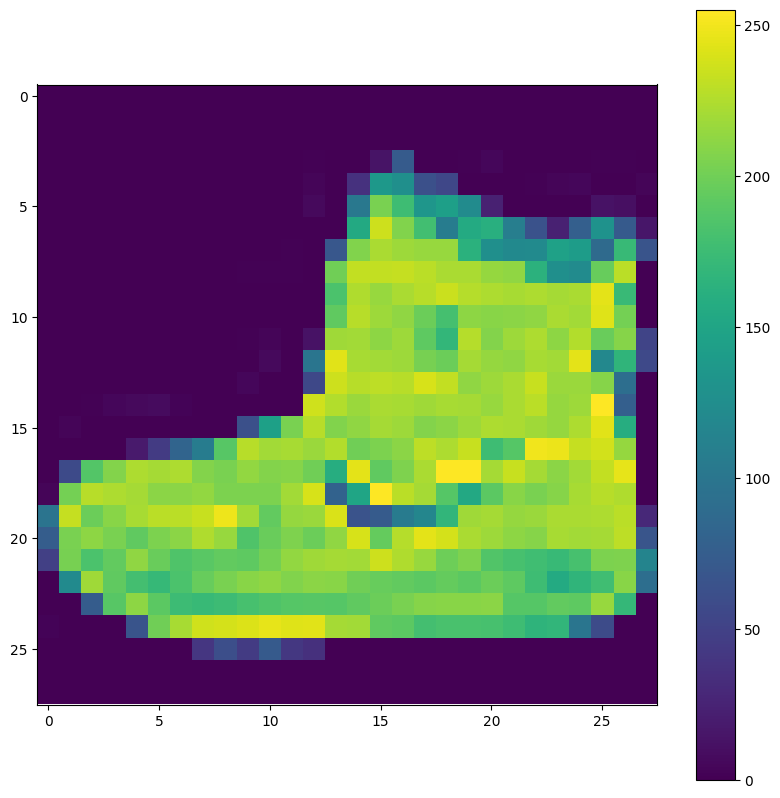

In [13]:
# Lets visualize some data
plt.figure(figsize=(10, 10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# Pre-processing of data
# We have to scale the image from 0 to 1 to feed it to the Neural Networks
train_images = train_images / 255.0
test_images = test_images / 255.0

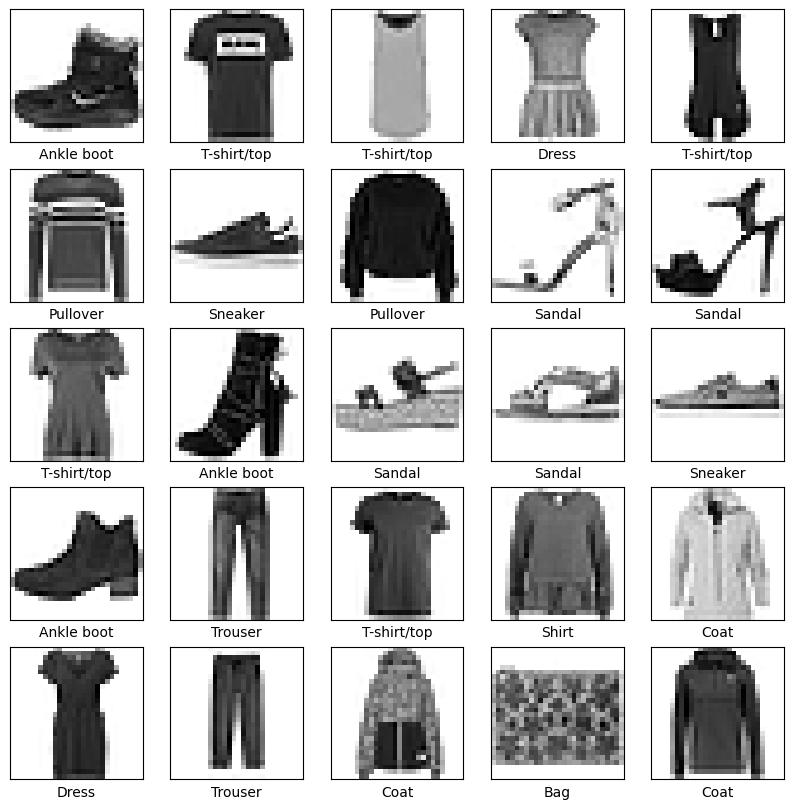

In [21]:
# Lets display some images:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
# Setup the layers. This example is of DNN not CNN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Compiling the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Fit the model
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8671 - loss: 0.3632
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8720 - loss: 0.3540
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8753 - loss: 0.3495
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8762 - loss: 0.3383
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8777 - loss: 0.3355
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8801 - loss: 0.3256
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8817 - loss: 0.3170
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8851 - loss: 0.3145
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8876 - loss: 0.3097
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8902 - loss: 0.3029
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8882 - loss: 0.2983
Epoch 12/100
1875/

In [34]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [33]:
# Making prediction
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.1366465e-14, 2.6957647e-18, 8.1443123e-23, 2.8839850e-15,
       3.1720901e-17, 4.4040223e-12, 8.5712145e-13, 4.3663616e-07,
       4.7631136e-14, 9.9999946e-01], dtype=float32)

In [38]:
print(np.max(predictions[0]) * 100)

99.99995


In [39]:
print(test_labels[0])

9


In [41]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

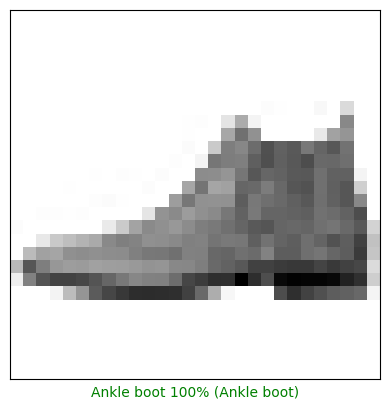

In [42]:
plot_image(0, predictions, test_labels, test_images)
plt.show()

In [43]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

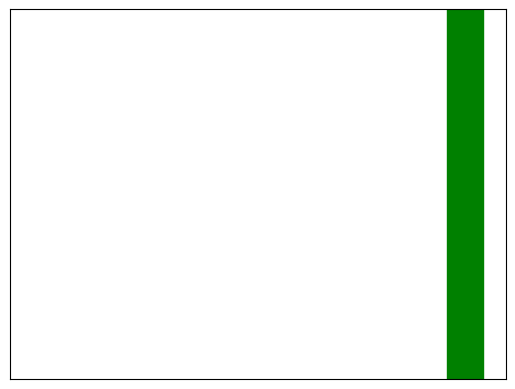

In [44]:
plot_value_array(0, predictions, test_labels)
plt.show()

In [51]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

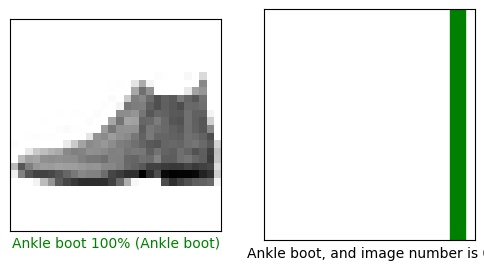

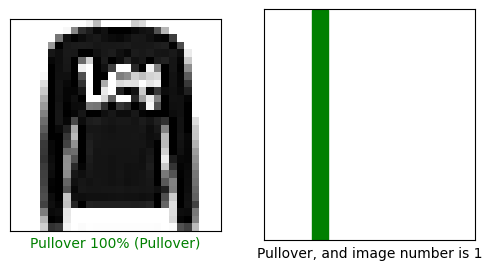

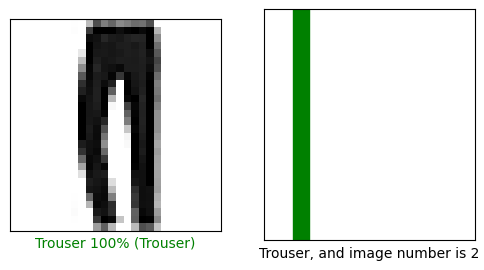

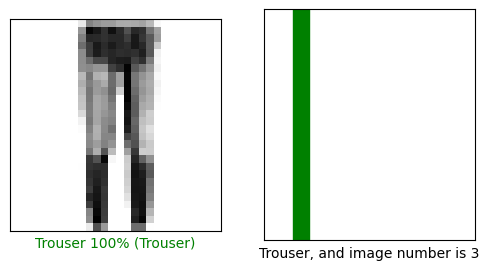

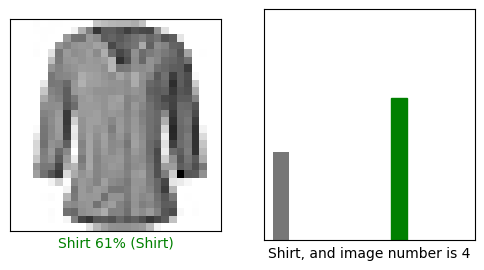

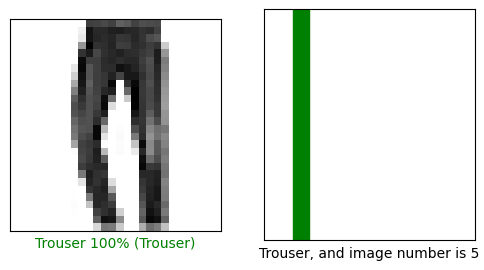

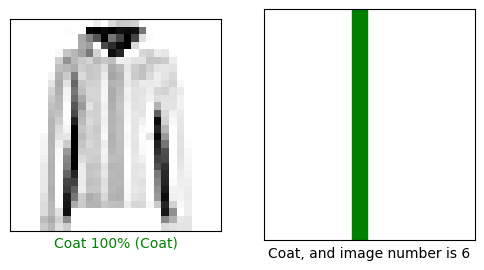

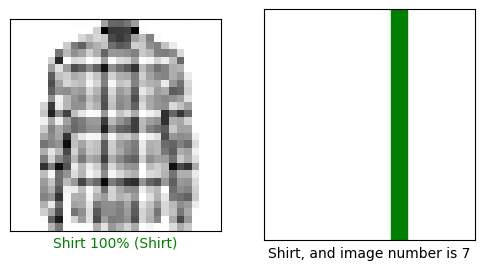

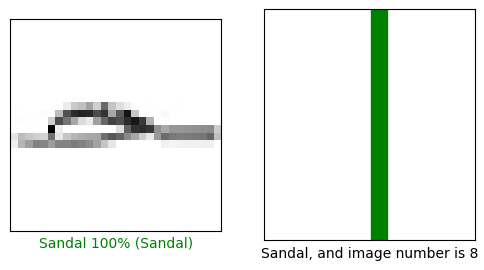

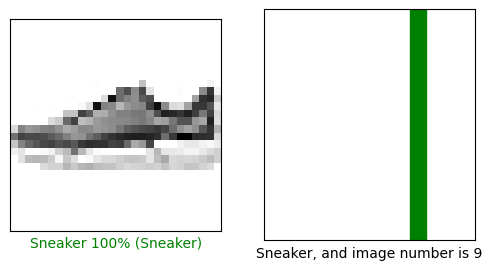

In [58]:
# Look at all the images
i = 0
while i < 10:
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions, test_labels)
  plt.xlabel(f"{class_names[test_labels[i]]}, and image number is {i}")
  plt.show()
  i += 1